In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy.stats import boxcox
from sympy import diff

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Сначала нужны функции, взяла их из готовых материалов лектора

In [217]:
# Dickey-Fuller



def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 
                                               'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [218]:
# Функция для коррелограмм

def tsplot(y, lags = None, figsize = (14, 8), style = 'bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize = figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan = 2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color = 'green', label = 'Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags = lags, ax = acf_ax, alpha = 0.05)
        smt.graphics.plot_pacf(y, lags = lags, ax = pacf_ax, alpha = 0.05)

        plt.tight_layout()
    return

In [219]:
# Функция для поиска сезонности

def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize = (16, 8))
        ts_ax = plt.axes()
        ts.plot(ax = ts_ax, color = 'green')
        new_series.plot(ax = ts_ax, style = 'ro')

Теперь подгружаю все датасеты

In [220]:
sales_of_company_x = pd.read_csv('/Users/anastasiafedoracenko/Desktop/Series/monthly-sales-of-company-x-jan-6.csv')
robberies_in_boston = pd.read_csv('/Users/anastasiafedoracenko/Desktop/Series/monthly-boston-armed-robberies-j.csv')
airlines_passengers = pd.read_csv('/Users/anastasiafedoracenko/Desktop/Series/international-airline-passengers.csv')
mean_monthly_temp = pd.read_csv('/Users/anastasiafedoracenko/Desktop/Series/mean-monthly-air-temperature-deg.csv')
dowjones_closing = pd.read_csv('/Users/anastasiafedoracenko/Desktop/Series/weekly-closings-of-the-dowjones-.csv')
female_births = pd.read_csv('/Users/anastasiafedoracenko/Desktop/Series/daily-total-female-births-in-cal.csv')

In [221]:
all_series = {
    'Monthly sales of company X': sales_of_company_x['Count'],
    'Monthly Boston armed robberies': robberies_in_boston['Count'],
    'International airline passengers: monthly totals in thousands': airlines_passengers['Count'],
    'Mean monthly air temperature (Deg. F) Nottingham Castle': mean_monthly_temp['Deg'],
    'Weekly closings of the Dow-Jones industrial average': dowjones_closing['Close'],
    'Daily total female births in California': female_births['Count']
}

In [222]:
all_series

{'Monthly sales of company X': 0     154
 1      96
 2      73
 3      49
 4      36
      ... 
 72    628
 73    308
 74    324
 75    248
 76    272
 Name: Count, Length: 77, dtype: int64,
 'Monthly Boston armed robberies': 0       41
 1       39
 2       50
 3       40
 4       43
       ... 
 113    316
 114    398
 115    394
 116    431
 117    431
 Name: Count, Length: 118, dtype: int64,
 'International airline passengers: monthly totals in thousands': 0      112
 1      118
 2      132
 3      129
 4      121
       ... 
 139    606
 140    508
 141    461
 142    390
 143    432
 Name: Count, Length: 144, dtype: int64,
 'Mean monthly air temperature (Deg. F) Nottingham Castle': 0      40.6
 1      40.8
 2      44.4
 3      46.7
 4      54.1
        ... 
 235    61.8
 236    58.2
 237    46.7
 238    46.6
 239    37.8
 Name: Deg, Length: 240, dtype: float64,
 'Weekly closings of the Dow-Jones industrial average': 0      890.19
 1      901.80
 2      888.51
 3      887.78
 4    

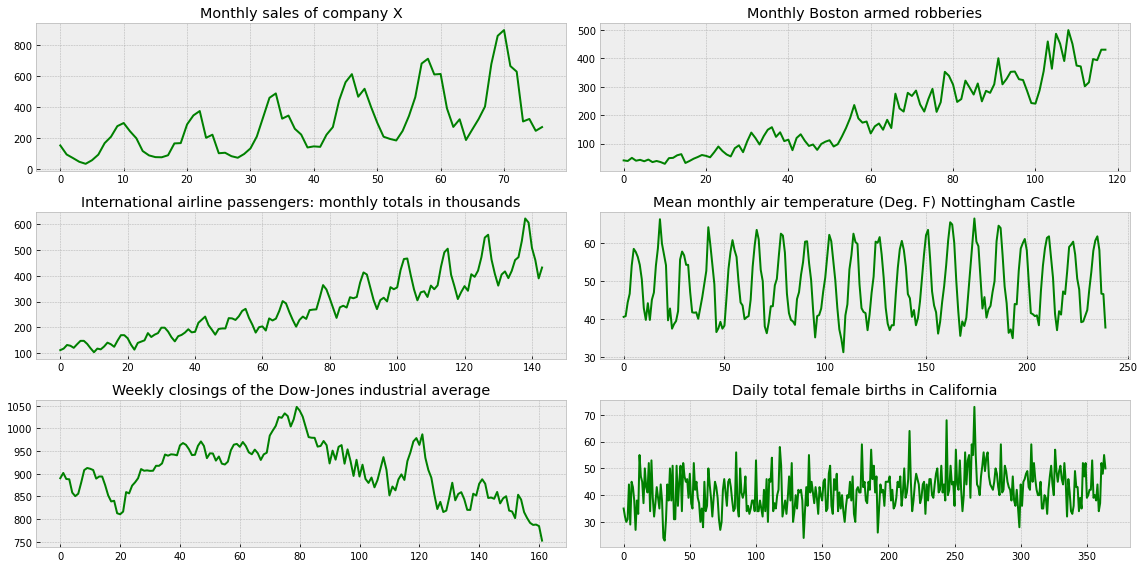

In [223]:
with plt.style.context('bmh'):
    plt.figure(figsize = (16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax = ts_ax, color = 'green')
        ts_ax.set_title(key)
        
    plt.tight_layout()

### 1. Monthly sales of company X 

In [224]:
sales_of_company_x_series = sales_of_company_x['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


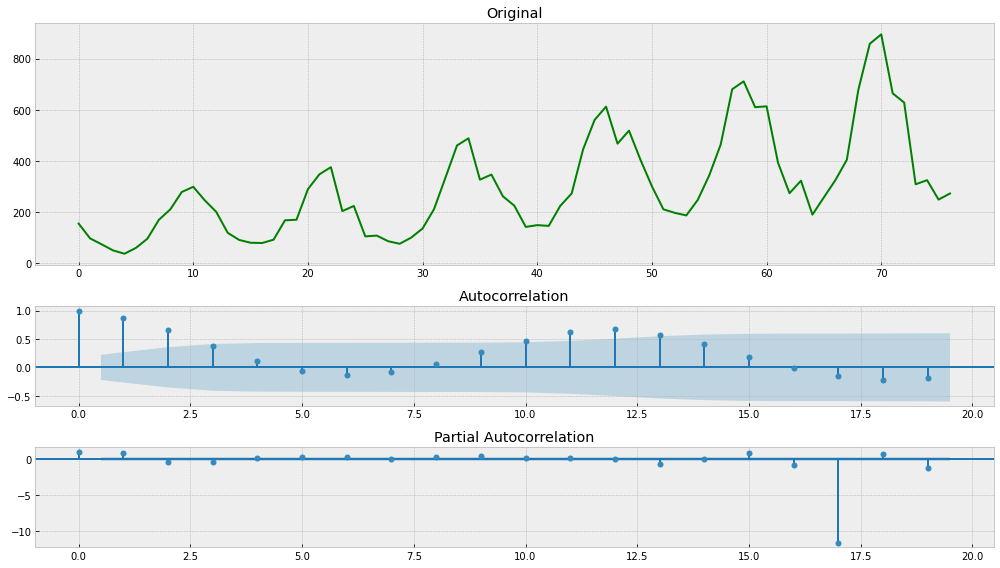

In [225]:
tsplot(sales_of_company_x_series)

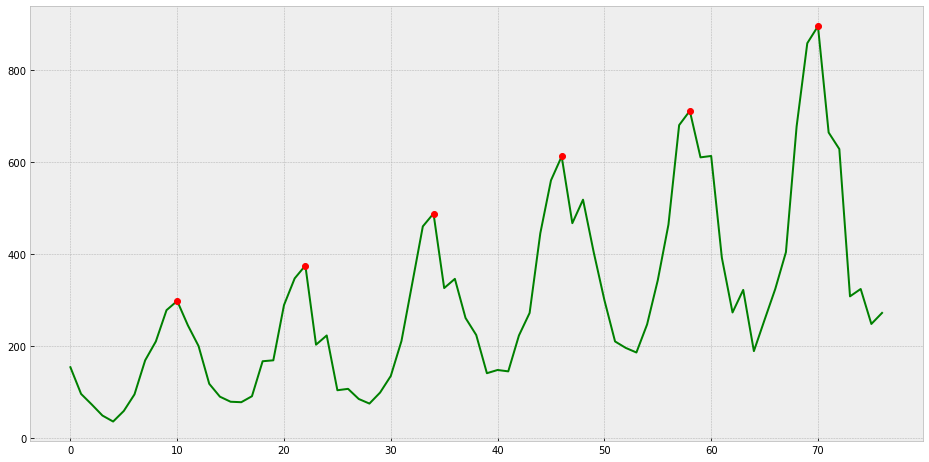

In [226]:
plot_ts_and_points(sales_of_company_x_series, 10, 12)

Видно, что сезонность имеет период около 12

Применим метом Бокса-Кокса для того, чтобы нормализировать дисперсию


Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


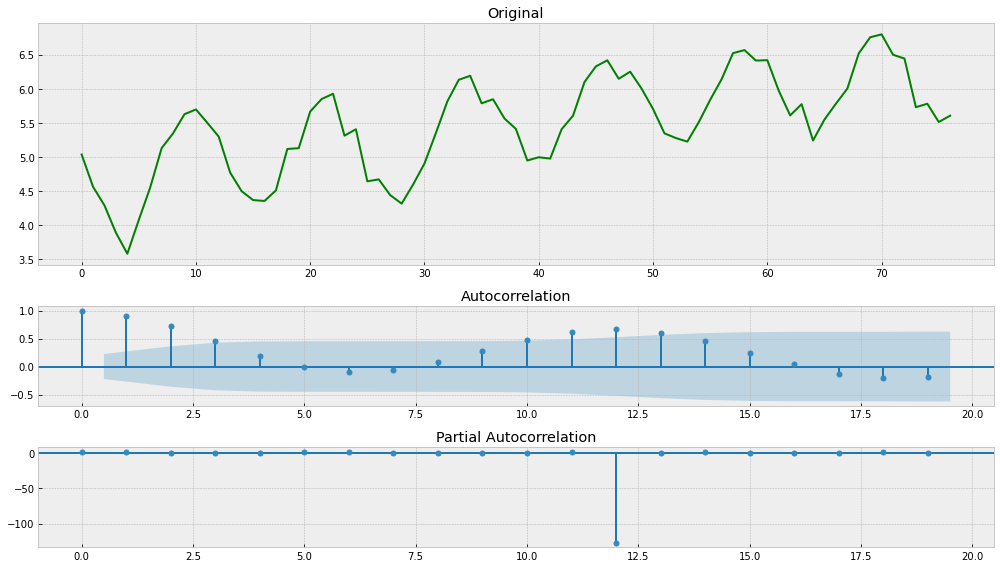

In [227]:
sales_of_company_x_series = boxcox(sales_of_company_x_series, 0)

tsplot(sales_of_company_x_series)

Убираю тренд

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


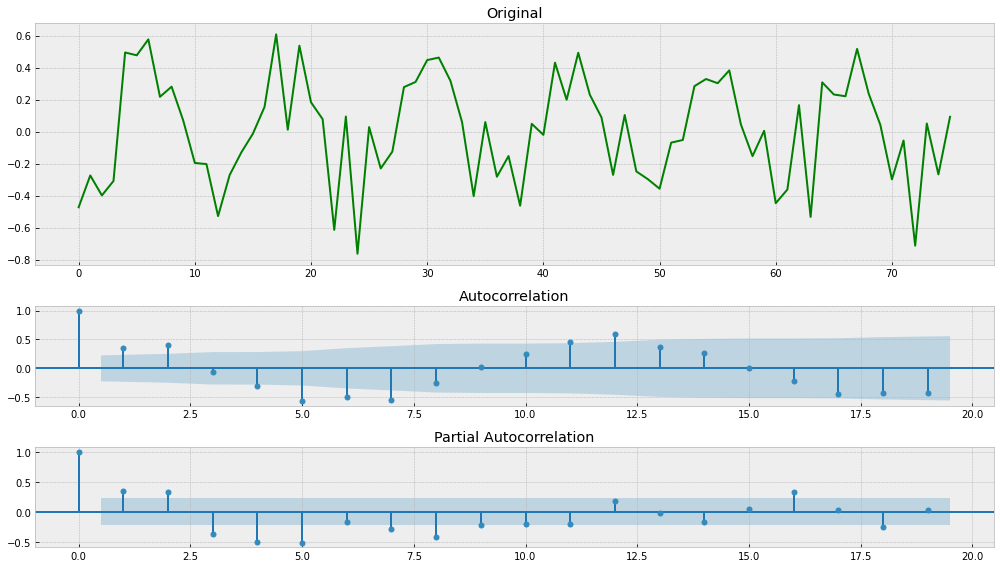

In [228]:
sales_of_company_x_series = sales_of_company_x_series[1:] - sales_of_company_x_series[:-1]

tsplot(sales_of_company_x_series)

Убираю сезонность 

In [229]:
sales_of_company_x_series = sales_of_company_x_series[12:] - sales_of_company_x_series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


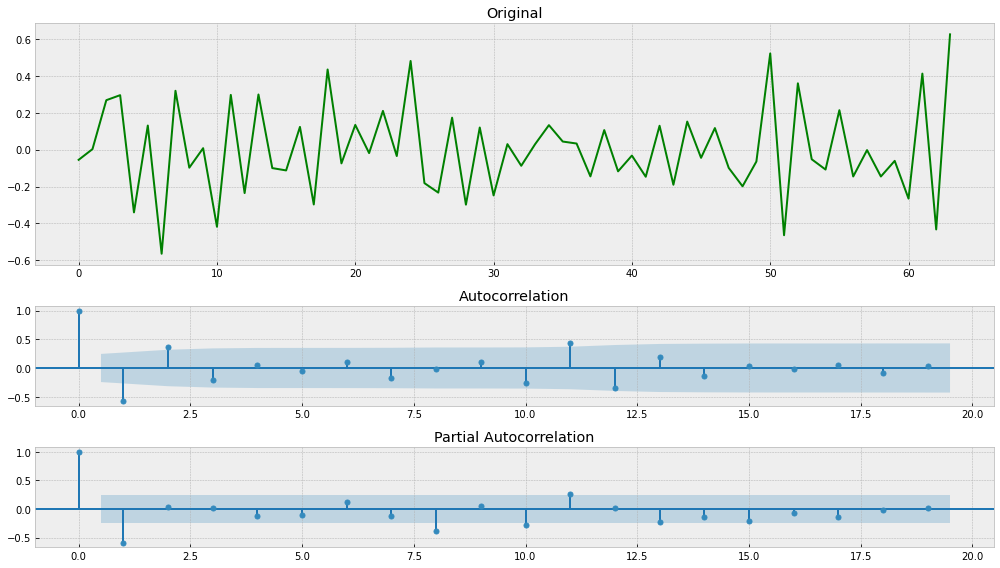

In [230]:
tsplot(sales_of_company_x_series)

Будто ряд стал менее стационарен, показатель теста ухудшился, что не так сделала?

### 2. Monthly Boston armed robberies

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


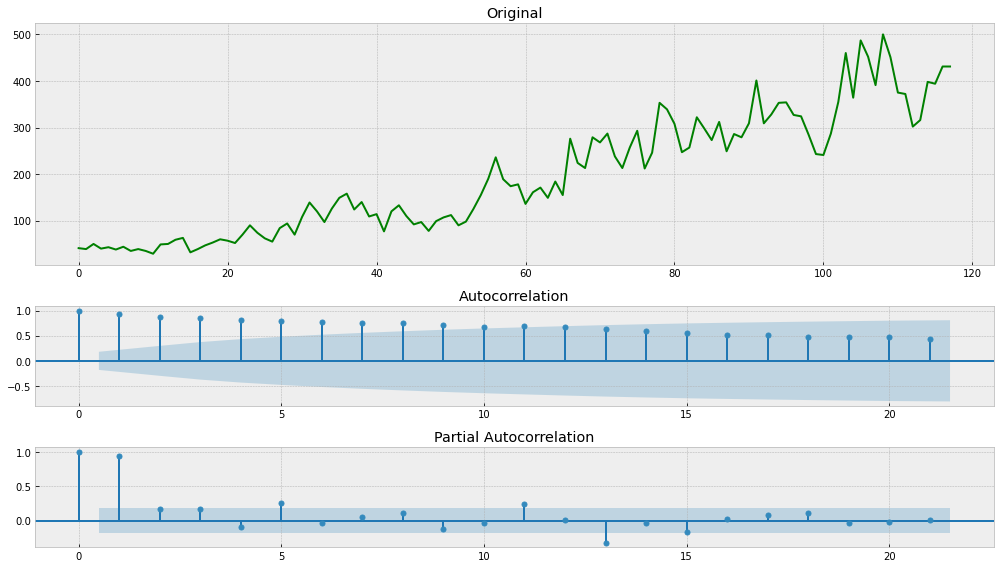

In [231]:
robberies_in_boston_series = robberies_in_boston['Count']

tsplot(robberies_in_boston_series)

Метод Бокса-кокса

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


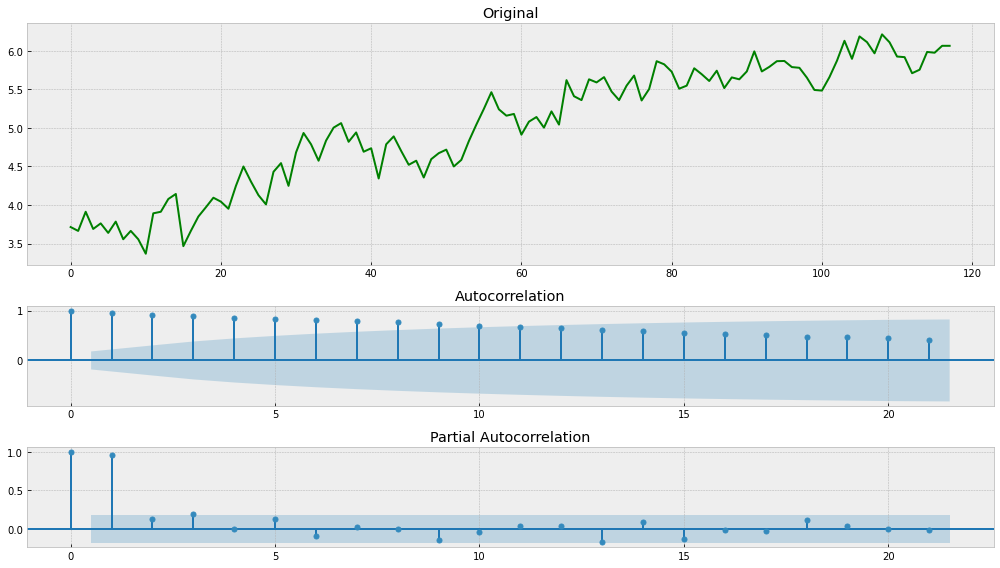

In [232]:
robberies_in_boston_series = boxcox(robberies_in_boston_series, 0)

tsplot(robberies_in_boston_series)

Убираю тренд 

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


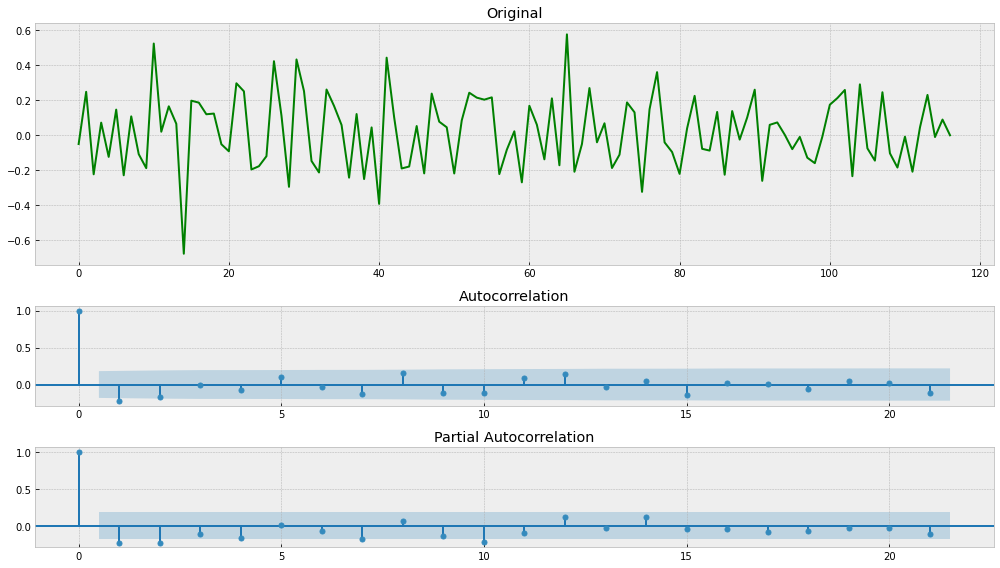

In [233]:
robberies_in_boston_series = robberies_in_boston_series[1:] - robberies_in_boston_series[:-1]

tsplot(robberies_in_boston_series)

По-моему вышло все четко, ряд стационарен 

### 3. International airline passengers: monthly totals in thousands


Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


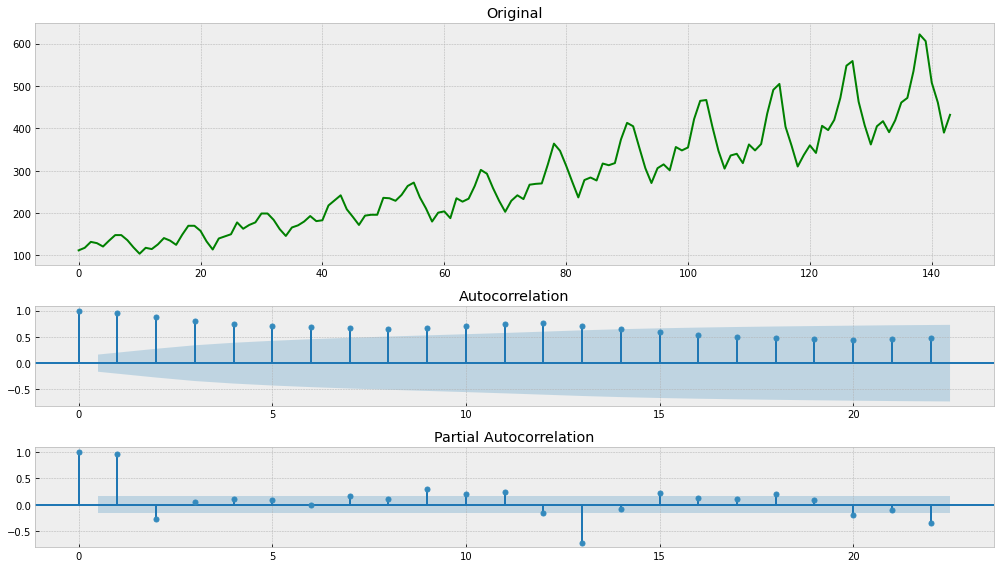

In [234]:
airlines_passengers_series = airlines_passengers['Count']

tsplot(airlines_passengers_series)

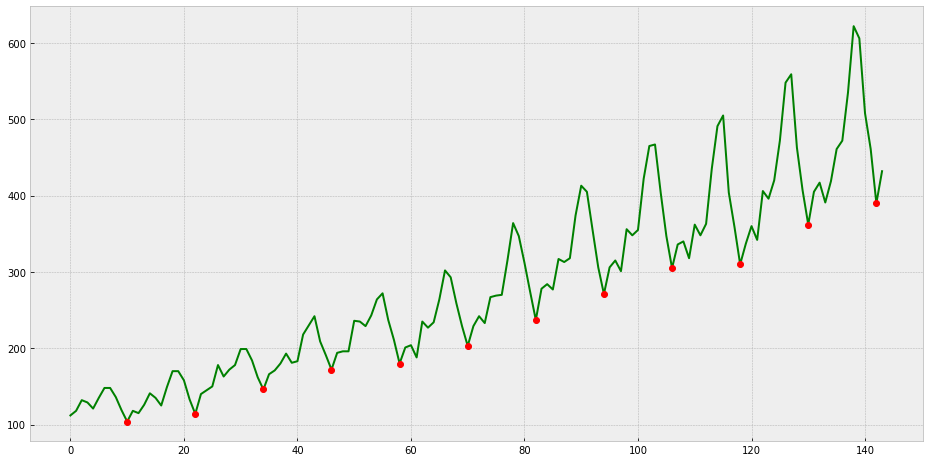

In [235]:
plot_ts_and_points(airlines_passengers_series, 10, 12)

Тут тренд с переодичностью ~12 

Применяю метод Бокса-кокса и убираю тренд и сезон

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


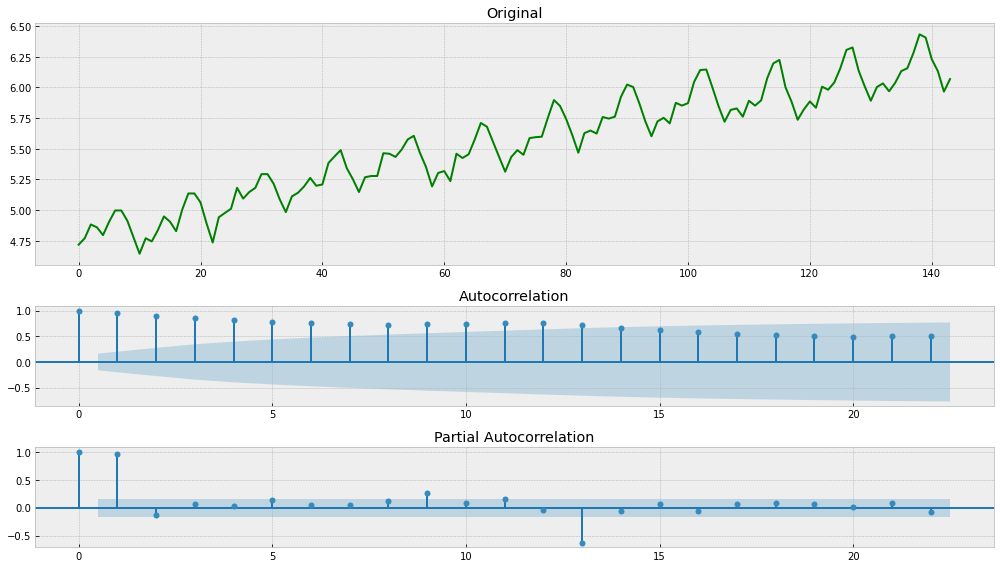

In [236]:
airlines_passengers_series = boxcox(airlines_passengers_series, 0)

tsplot(airlines_passengers_series)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


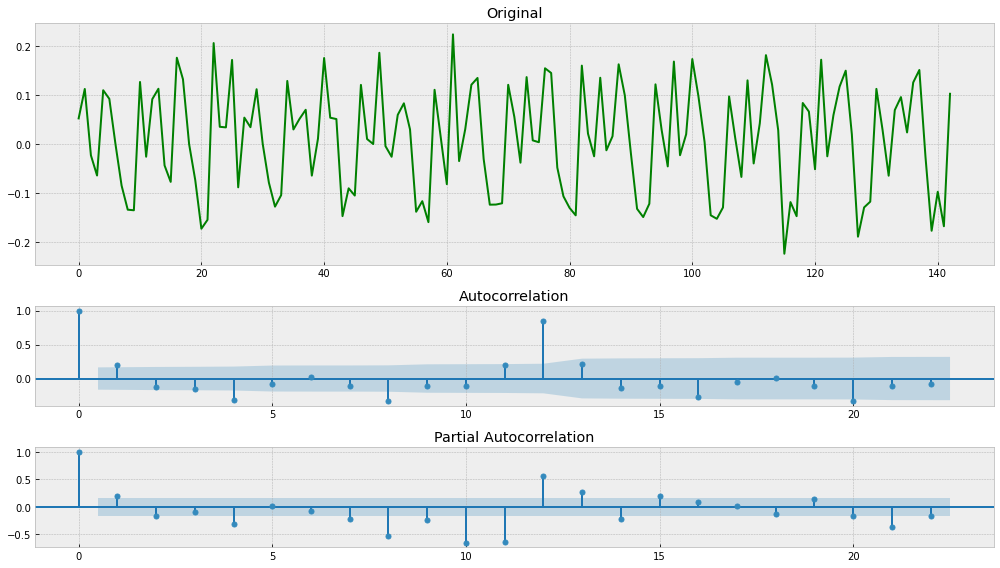

In [237]:
airlines_passengers_series = airlines_passengers_series[1:] - airlines_passengers_series[:-1]

tsplot(airlines_passengers_series)

In [238]:
airlines_passengers_series = airlines_passengers_series[12:] - airlines_passengers_series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


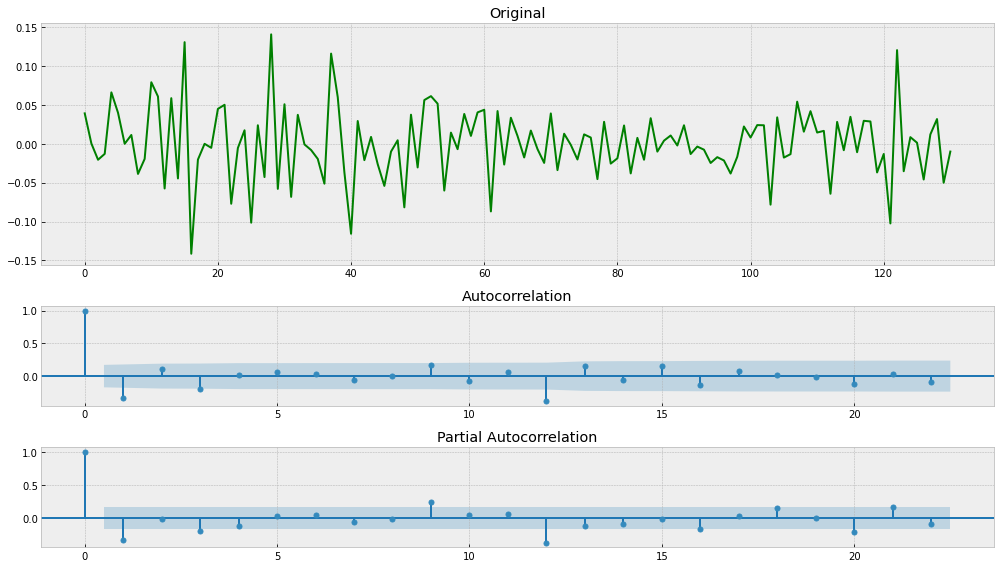

In [239]:
tsplot(airlines_passengers_series)

Ряд номер 3 - стационарен )


### 4. Mean monthly air temperature (Deg. F) Nottingham Castle

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


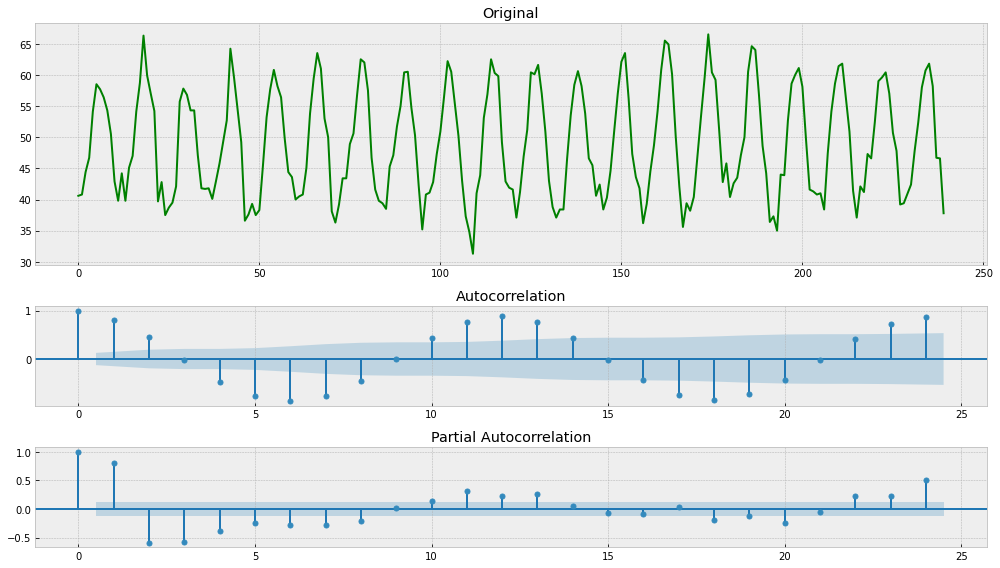

In [240]:
mean_monthly_temp_series = mean_monthly_temp["Deg"]

tsplot(mean_monthly_temp_series)

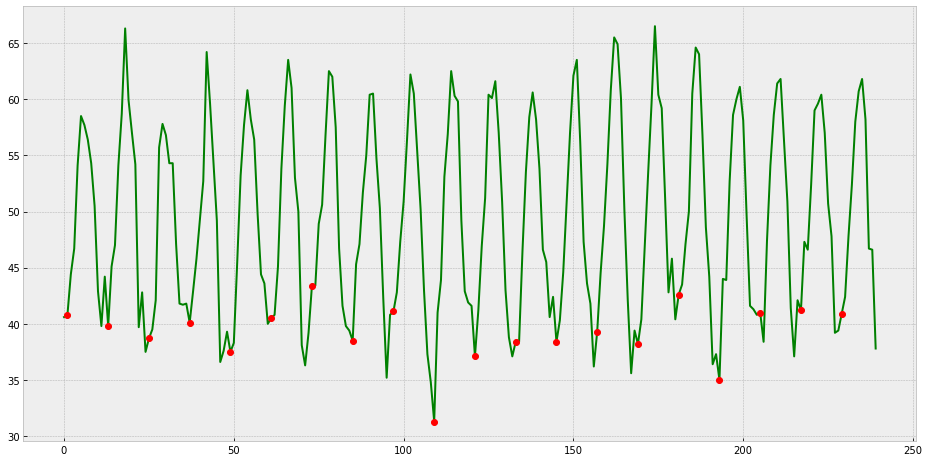

In [241]:
plot_ts_and_points(mean_monthly_temp_series, 1, 12)

Тут сезонность с периодом около ~10-12, скорее 12 

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


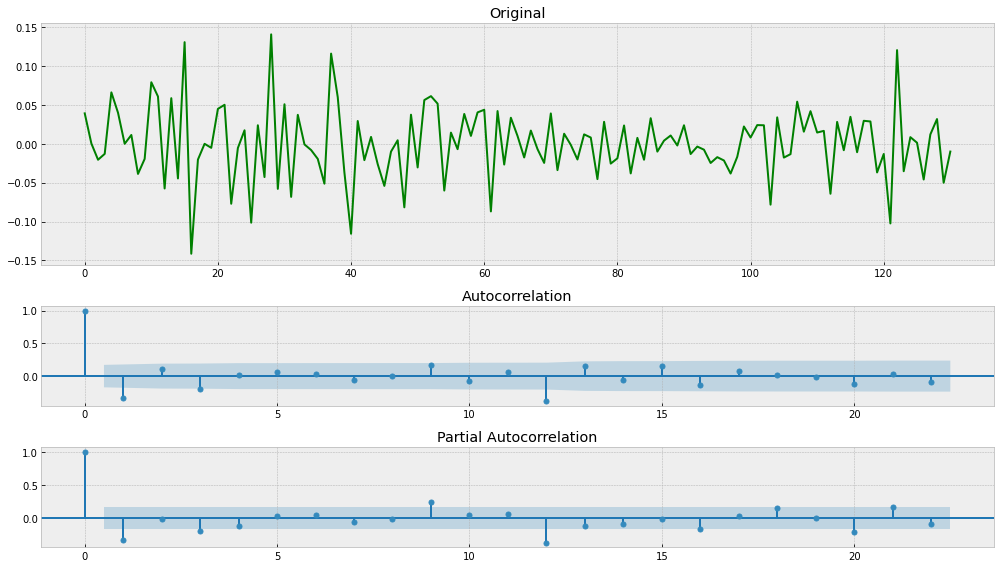

In [242]:
mean_monthly_temp_series = mean_monthly_temp_series[12:] - mean_monthly_temp_series[:-12]
tsplot(airlines_passengers_series)

Готово, ряд стационарен 

### 5. Weekly closings of the Dow-Jones industrial average

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


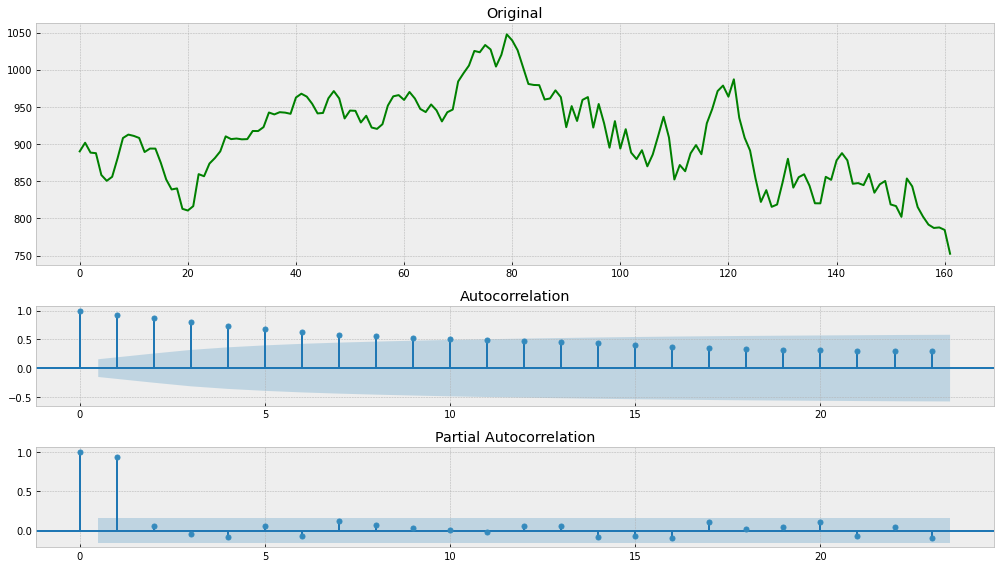

In [195]:
dowjones_closing_series = dowjones_closing["Close"]

tsplot(dowjones_closing_series)

In [246]:
dowjones_closing_series = np.diff(dowjones_closing.Close)

Results of Dickey-Fuller Test:
Test Statistic                  -3.365230
p-value                          0.012203
#Lags Used                      14.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


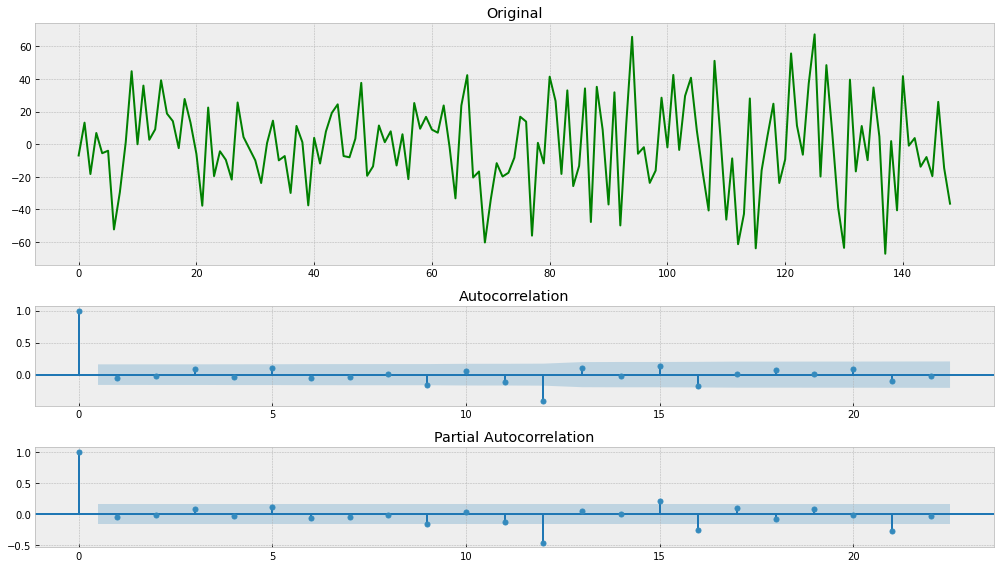

In [247]:
dowjones_closing_series = dowjones_closing_series[12:] - dowjones_closing_series[:-12]
tsplot(dowjones_closing_series)

Ряд стационарен, наконец-то ))

# после дифференцирования та же самая ошибка, не понимаю что за ошибка. То, что остальные значения нули - норм?

### 6. Daily total female births in California

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


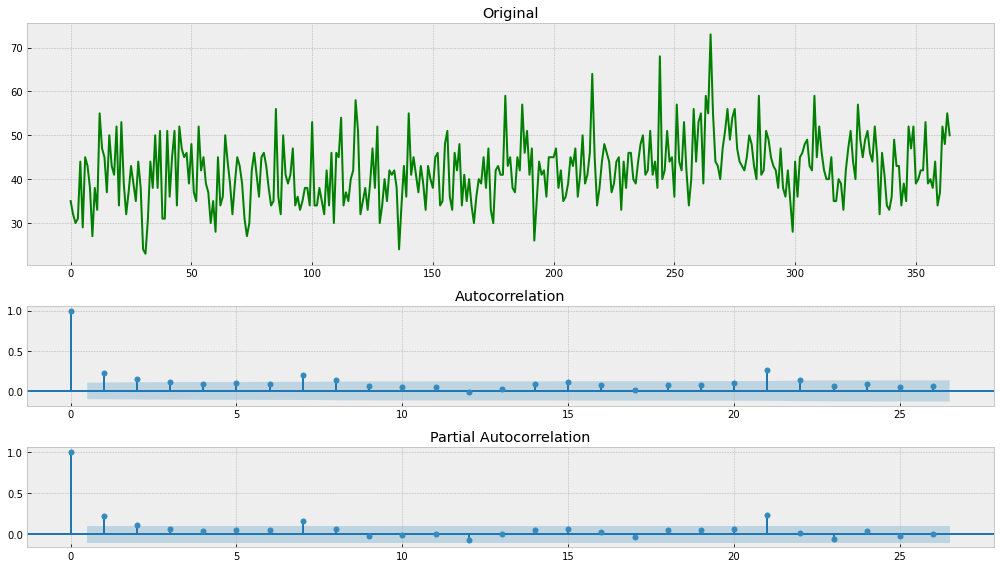

In [197]:
female_births = female_births["Count"]

tsplot(female_births)

Тут изночально стационарный ряд, все ок 